# 1주차 과제_0304(화)

핸즈온 4장 모델 훈련 p.157-184

## 4.1 선형 회귀

일반적인 선형 모델 : 입력 특성의 가중치 합과 편향 (또는 절편)이라는 상수를 더해 예측을 만듬

**선형 회귀 모델의 예측**


\
$\hat y=\theta_0 + \theta_1x_1+ \cdots + \theta_nx_n$

- $\hat y$ : 예측값

- $n$ : 특성의 수

- $x_i$ : $i$번째 특성값

- $\theta_j$ : $j$번째 모델 파라미터

**선형 회귀 모델의 예측(벡터 형태)**

\
$\hat y= h_{\theta}(x) = \theta x$

- $\theta$ : 편향 $\theta_0$과 $\theta_1$에서 $\theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터

- $x$ : $x_0$에서 $x_n$까지 담은 샘플의 특성 벡터, $x_0$는 항상 1임

- $\theta x$ : 벡터 $\theta$와 $x$의 점곱, $\theta_0x_0 + \theta_1x_1+ \cdots + \theta_nx_n$와 동일

- $h_\theta$ : 모델 파라미터 $\theta$를 사용한 가설 함수

모델 훈련  : 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것 → 이를 위해 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 함

선형 회귀 모델을 훈련시키려면 가장 널리 사용되는 성능 지표인 RMSE(평균 제곱근 오차)를 최소화하는 $\theta$를 찾아야 함

실제로는 MSE(평균 제곱 오차)를 최소화하는 것이 같은 결과를 내면서 더 간단함!

**선형 회귀 모델의 MSE 비용 함수**

\
$MSE(X, h_\theta) =\frac{1}{m}\displaystyle\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})^2$

### 4.1.1 정규방정식

**정규방정식**

\
비용 함수를 최소화하는 $\theta$값을 찾기 위한 해석적인 방법,

$\hat \theta=(X^TX)^{(-1)}X^Ty$

- $\hat \theta$ : 비용 함수를 최소화하는 $\theta$값

- $y$ : $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) # 가우시안_잡음 함수 사용

In [ ]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.06389636],
       [3.11435838]])

기댓값 : $\theta_0$ = 4, $\theta_1$ = 3

재현값 : $\theta_0$ = 4.034, $\theta_1$ = 2.938

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.06389636],
       [10.29261311]])

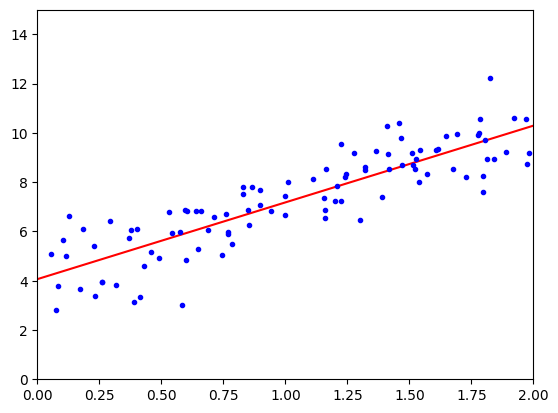

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.06389636],
       [10.29261311]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.06389636],
       [3.11435838]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.06389636],
       [3.11435838]])

np.linalg.pinv() 함수를 사용해 $X$의 유사역행렬인 $X^+$를 직접 구할 수 있음

### 4.1.2 계산 복잡도

정규방정식은 $(n+1) \times (n+1)$ 크기가 되는 $X^tX$의 역행렬으르 계산함

역행렬을 계산하는 계산 복잡도는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$ 사이임 → 특성 수가 두 배로 늘어나면 계산 시간이 대략 2$^{2.4}$=5.3에서 2$^3$=8배로 증가함

## 4.2 경사 하강법

**경사 하강법(gradient descent, GD)**

여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘

경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해나가는 것

$\theta$를 임의의 값으로 시작해서(무작위 초기화) 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 떄까지 점진적으로 향상 시킴

중요한 파라미터 : 스텝의 크기 ← 학습률 하이퍼파라미터로 결정됨

- 학습률이 너무 작을 때 :  알고리즘이 수렴하기 위해 많은 반복을 진행하므로 시간이 오래 걸림

- 학습률이 너무 클 때 : 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 함





### 4.2.1 배치 경사 하강법

편도 함수 : 각 모델 파라미터 $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산하는 것

**비용 함수의 편도함수**

\
$\frac{\partial}{\partial\theta_j}MSE(\theta)=\frac{2}{m}\displaystyle\sum_{i=1}^m(\theta^Tx^{(i)}-y^{(i)})x_j^{(i)}$


**비용 함수의 그레이디언트 백터**


\
$
\nabla_{\theta} MSE(\theta) =
\begin{bmatrix}
\frac{\partial}{\partial \theta_0} MSE(\theta) \\
\frac{\partial}{\partial \theta_1} MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n} MSE(\theta)
\end{bmatrix}
=
\frac{2}{m} X^T (X\theta - y)
$

**경사 하강법의 스텝**

\
\
$\theta^{(next\ step)}=\theta- {\eta}\nabla_{\theta}MSE(\theta)$

In [ ]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations) :
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.06389636],
       [3.11435838]])

정규방정식으로 찾은 것과 동일함 → 경사 하강법이 완벽히 작동됨

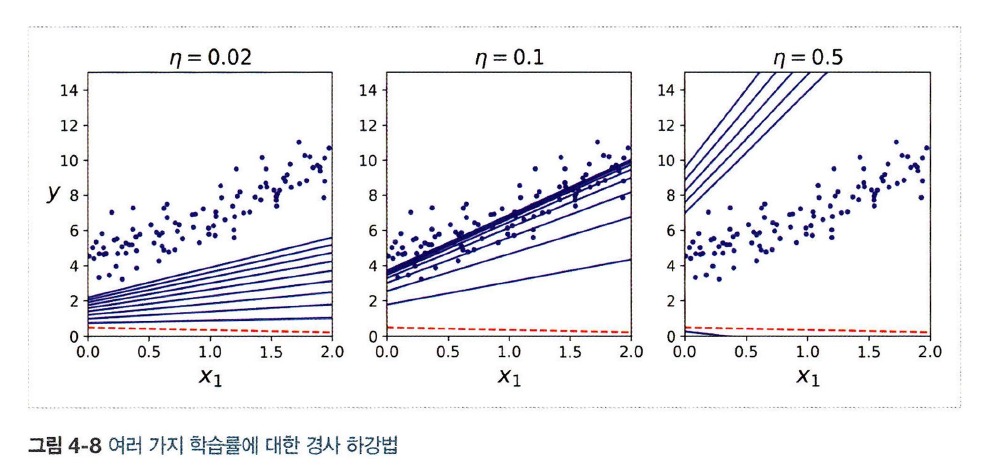

1. 학습률이 너무 낮음, 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것

2. 학습률이 적당해 보임, 반복 몇 번만에 이미 최적점에 수렴함

3. 학습률이 너무 높음, 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산함

반속 횟수 지정 : 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즈그 벡터의 노름이 어떤 값 ϵ(허용오차)보다 작아지면 경사 하강법이 거의 최솟값에 도달한 것이므로 알고리즘을 중지

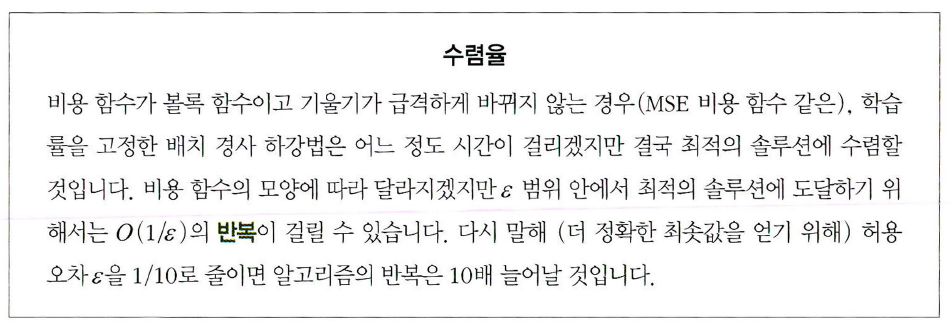

### 4.2.2 확률적 경사 하강법

배치 경사 하강법 : 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산하기 때문에 훈련 세트가 커지면 매우 느려짐

\
**확률적 경사 하강법**

매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산함

매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠름

매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음

그러나 확률적(즉, 무작위)이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정함

In [ ]:
n_epochs = 50 # 각 반복을 에포크라고 함
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

array([[4.02051803],
       [3.10970128]])

50번만 반복하고도 매우 좋은 값에 도달함

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있음

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.041039]), array([3.17753688]))

### 4.2.3 미니배치 경사 하강법

**미니배치 경사 하강법**

각 스텝에서 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산함

장점 : 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상

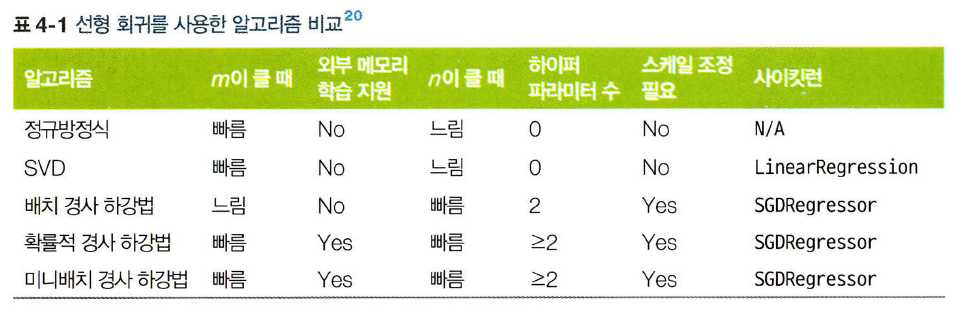

## 4.3 다항 회귀

**다항 회귀**

비선형 데이터를 학습하는데 선형 모델을 사용하기 위해 각 특성의 거듭제곱을 새로운 특성으로 추가하고 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

In [ ]:
np.random.seed(42) # 매 실행마다 동일한 난수 생성하도록 고정

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

(-3.0, 3.0, 0.0, 10.0)

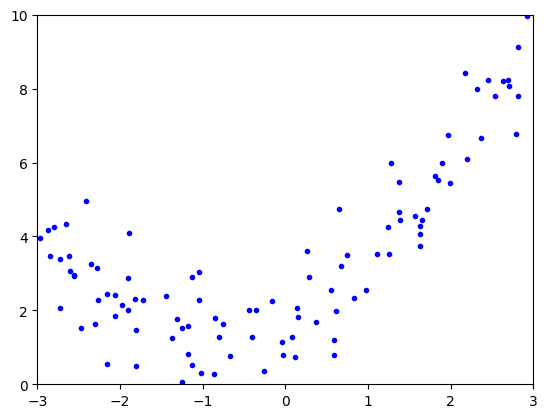

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("", fontsize=18)
plt.ylabel("", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [ ]:
# 선형 회귀가 맞지 않으므로 훈련 데이터에 있는 각 특성을 제곱하여 새로운 특성으로 추가하는 형태로 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

## 4.4 학습 곡선

고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이기 때문에 과적합 위험이 큼

모델이 데이터에 과대적합 또는 과소적합되었는지 판단하는 법

1. 교차 검증 사용

    훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘면 과대적합, 양쪽에 모두 안 좋으면 과소적합

2. 학습 곡선

    훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타내고 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련 시킴

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y) :
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
  train_errors, val_errors = [], []

  for m in range(1, len(X_train)) :
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict (X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "test")

  plt.legend(loc = "upper right", fontsize = 14) # 라벨 추가

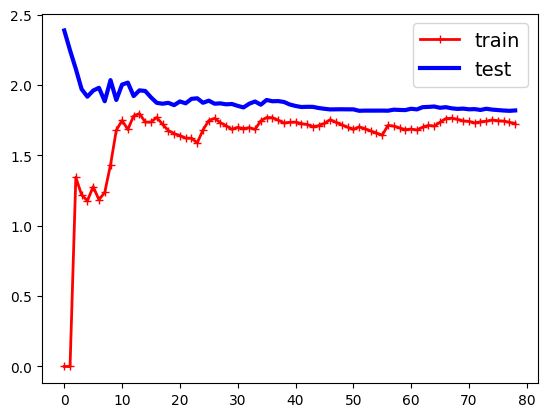

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

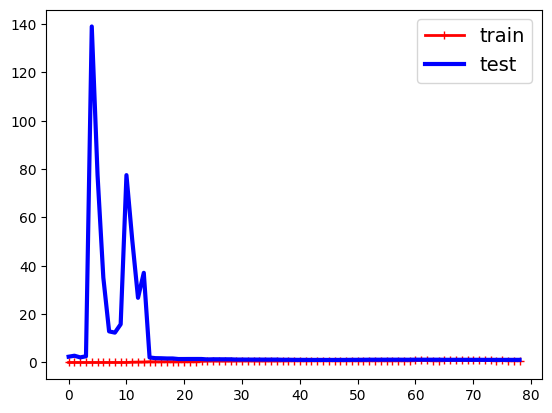

In [ ]:
# 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선 그리기
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree = 10, include_bias = False))
                                , ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

이전 학습 곡선과 비교했을 때 차이점

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음

- 두 곡선 사이에 공간이 있음. 즉, 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고 이는 과대적합 모델의 특징임

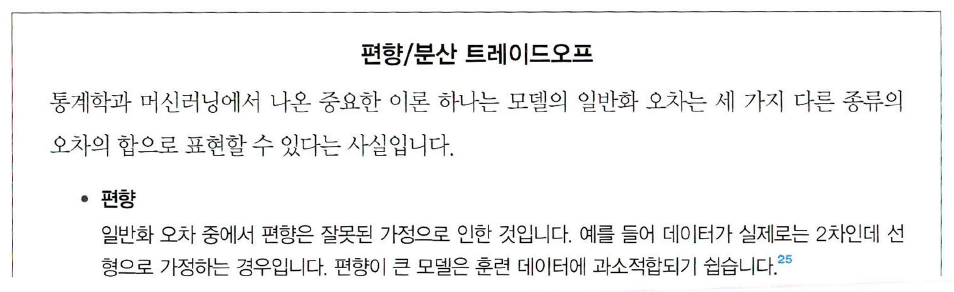
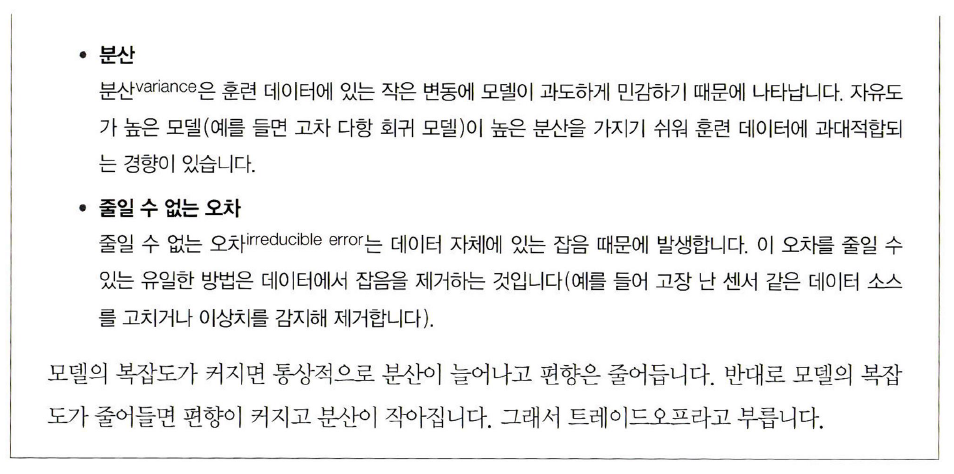